In [ ]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

In [4]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint

# Ollama를 사용하여 로컬에서 실행 중인 deepseek-r1:1.5b 모델 로드
llm = ChatOllama(model="deepseek-r1:1.5b")


# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])


# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "What is LangChain?"
response = chain.invoke({"question": question})

print(type(response))
pprint(response.content)

<class 'langchain_core.messages.ai.AIMessage'>
('<think>\n'
 "Okay, so I'm trying to understand what LangChain is. From the definition "
 "provided, it looks like it's a framework that brings together language "
 'models with other components of machine learning pipelines. That sounds '
 'pretty broad, but let me break it down.\n'
 '\n'
 'First, I know that language models are systems that can generate text based '
 "on some input. They're used in tasks like text translation, summarization, "
 'and even creative writing. So LangChain must be something that uses these '
 'models in a more integrated way with other machine learning tools.\n'
 '\n'
 'The framework includes components like data pre-processing, feature '
 'engineering, model training, inference, evaluation, deployment, and '
 'post-processing. That makes sense because any machine learning pipeline '
 'would need various steps to process data, build models, make predictions, '
 'assess results, etc.\n'
 '\n'
 'I wonder how L

In [7]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# Ollama를 사용하여 로컬에서 실행 중인 qwen3:1.7b 모델 로드
llm = ChatOllama(model="qwen3:1.7b")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "파이썬은 무엇인가요?"
response = chain.invoke({"question": question})

print(response.content)

<think>
Okay, the user is asking, "What is Python?" and I need to provide a detailed answer. Let me start by recalling the basics of Python.

First, Python is a programming language. It's known for being easy to read and write, which makes it popular among beginners. I should mention its design philosophy, like the "Readability Counts" motto. That's a key point.

Next, I should talk about its features. It's interpreted, which means it's not compiled like C++. Also, it's dynamically typed, so variables don't need explicit types. Oh, and it's garbage-collected, which helps manage memory automatically.

Then, the standard library is important. Mentioning modules like os, sys, math, and how they help with common tasks. Also, the Python interpreter and how it's used in different environments.

I should note that Python is used in various fields: web development (Django, Flask), data science (Pandas, NumPy), machine learning (Scikit-learn, TensorFlow), and automation. Maybe give examples lik

In [9]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)


<think>
First, I need to compare the two numbers: 9.9 and 9.11.

To make an accurate comparison, it's helpful to express both numbers with the same number of decimal places by adding a trailing zero to 9.9. This gives me 9.90.

Now, both numbers are 9.90 and 9.11.

Comparing the whole number part first: Both have 9 in the units place, so they are equal there.

Next, I'll compare the tenths place. In 9.90, the tenths digit is 9, while in 9.11, it's 1. Since 9 is greater than 1, 9.90 (or 9.9) is larger than 9.11.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, let's compare them step by step:

1. **Express Both Numbers with the Same Decimal Places:**
   
   - **9.9** can be written as **9.90** to match the two decimal places of **9.11**.
   
2. **Compare the Whole Number Part First:**
   
   - Both numbers have **9** in the units place, so they are equal here.

3. **Compare the Tenths Place:**
   
   - In **9.90**, the tent

In [10]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))    

<think>
First, I need to compare the two numbers: 9.9 and 9.11.

To make an accurate comparison, it's helpful to express both numbers with the same number of decimal places by adding a trailing zero to 9.9. This gives me 9.90.

Now, both numbers are 9.90 and 9.11.

Comparing the whole number part first: Both have 9 in the units place, so they are equal there.

Next, I'll compare the tenths place. In 9.90, the tenths digit is 9, while in 9.11, it's 1. Since 9 is greater than 1, 9.90 (or 9.9) is larger than 9.11.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, let's compare them step by step:

1. **Express Both Numbers with the Same Decimal Places:**
   
   - **9.9** can be written as **9.90** to match the two decimal places of **9.11**.
   
2. **Compare the Whole Number Part First:**
   
   - Both numbers have **9** in the units place, so they are equal here.

3. **Compare the Tenths Place:**
   
   - In **9.90**, the tenths digit is **9**.
   - In **9.11**, the tenths digit is **1**.
   
   Since **9 > 1**, **9.90 (or 9.9)** is larger than **9.11**.

4. **Conclusion:**
   
   \[
   \boxed{9.9}
   \]

In [13]:

#model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
# model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
model = ChatOllama(model="qwen3:1.7b", temperature=0.1)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think. Both numbers are decimals, right? So they have the same whole number part, which is 9. Then the decimal parts are 0.9 and 0.11. 

Hmm, I need to compare the decimal parts. Let's break it down. The first number is 9.9, which is 9 + 0.9. The second number is 9.11, which is 9 + 0.11. So the difference between the two decimal parts is 0.9 versus 0.11. 

Wait, 0.9 is larger than 0.11 because 0.9 is 9 tenths, and 0.11 is 11 hundredths. So 0.9 is definitely bigger than 0.11. Therefore, 9.9 is bigger than 9.11. 

But let me double-check to make sure I didn't make a mistake. Sometimes when comparing decimals, people might confuse the places. Let's write them out:

9.9 is the same as 9.90. So comparing 9.90 and 9.11. The first number has 9 in the units place, 9 in the tenths, and 0 in the hundredths. The second number has 9 in the units, 1 in the tenths, and 1 in the hundredths. 

So looking at the tenths

In [ ]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


### LangGraph를 사용하여 DeepSeek 모델과 Qwen 모델을 연동하기 
++ deepseek 모델은 추론을 qwen모델은 한글응답을 위하여 연동
* poetry add langgraph

In [22]:
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

#추론 모델
reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

#한글로 응답을 하기 위한 모델 
generation_model = ChatOllama(model="qwen3:1.7b", temperature=0.5)
print(generation_model)

#LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
#노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)


model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']
model='qwen3:1.7b' temperature=0.5
input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, templa

In [23]:
#DeepSeek를 통해서 추론 부분까지만 생성합니다. 
def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

<think>
Okay, let's see. The user is asking which is bigger between 9.9 and 9.11. Hmm. So first, I need to compare them. Both numbers start with 9, so the whole numbers are the same. But the decimals are different. 

Wait, 9.9 is the same as 9.90 when considering the decimal places. So if I write 9.9 as 9.90, then comparing 9.90 and 9.11. Now, looking at the tenths place: 9 vs 1. Since 9 is greater than 1, the tenths place determines the value here. So even though the whole numbers are the same, the decimal part makes 9.9 larger.

So the conclusion is that 9.9 is bigger than 9.11. But I need to make sure I explain this clearly without using the word "reasoning" or the process. Just present the answer in a natural way.
</think>

9.9와 9.11 중 더 큰 숫자는 **9.9**입니다.  
두 숫자는 정수 부분(9)이 같으므로, 소수 부분을 비교해야 합니다.  
9.9는 9.90과 같으며, 9.11은 9.11입니다.  
소수 부분에서 9 vs 1을 비교하면, 9는 1보다 크므로 9.9는 9.11보다 더 커요.
{'question': '9.9와 9.11 중 무엇이 더 큰가요?', 'thinking': "<think>\nFirst, I need to compare the two numbers: 

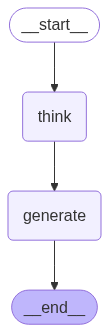

In [24]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)

### 2개 모델을 연동한 코드를 Gradio(UI) 사용해서 좀더 이쁘게 표현해보기

In [ ]:
import gradio as gr
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 설정: 두 개의 서로 다른 모델을 사용하여 추론과 답변 생성을 수행
# - reasoning_model: 추론을 담당하는 모델 (온도 낮음, 정확한 분석용)
# - generation_model: 답변 생성을 담당하는 모델 (온도 높음, 창의적 응답용)
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    temperature=0.7
)

# 상태(State) 정의: 그래프에서 상태를 유지하기 위한 데이터 구조
class State(TypedDict):
    question: str   # 사용자의 질문
    thinking: str   # 추론 결과
    answer: str     # 최종 답변

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])


def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        try:
            return text.decode('utf-8')
        except UnicodeDecodeError:
            return text.decode('utf-8', errors='ignore')
    
    # 문자열이지만 인코딩 문제가 있을 수 있는 경우 처리
    if isinstance(text, str):
        try:
            # 문자열을 UTF-8로 인코딩했다가 다시 디코딩하여 정리
            return text.encode('utf-8').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    thinking_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    question = ensure_utf8_string(state["question"])
    thinking = ensure_utf8_string(state["thinking"])
    
    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    answer_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 생성 함수: 상태(State) 간의 흐름을 정의
def create_graph():
    graph_builder = StateGraph(State).add_sequence([think, generate])
    graph_builder.add_edge(START, "think")
    return graph_builder.compile()

# Gradio 인터페이스 생성 및 실행
def chatbot_interface(message, history):
    graph = create_graph()
    inputs = {"question": message}
    result = graph.invoke(inputs)
    return result["answer"]

iface = gr.ChatInterface(fn=chatbot_interface, title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")

# Gradio 인터페이스 설정
def launch_gradio():
    iface = gr.Interface(fn=chatbot_interface, inputs="text", outputs="text", title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")
    iface.launch()

if __name__ == "__main__":
    #iface.launch()
    launch_gradio()